In [104]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# print(plt.style.available) # uncomment to print all styles
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12,6.0)
%matplotlib inline
from matplotlib import ticker

from scipy.optimize import curve_fit
import scipy.optimize as sopt

In [64]:
x2 = np.log(2) / 2
x1 = 200
x3 = 0

np.random.seed(100)
t = np.arange(0, 12)
data = x1 * np.exp(-x2 * t)*(1+np.random.rand(len(t))) + x3

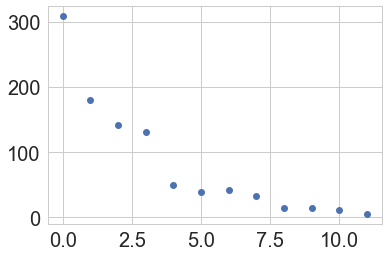

In [65]:
plt.plot(t, data, 'o')

In [66]:
def model(t, x1, x2, x3):
    return x1 * np.exp(-x2*t) + x3

In [67]:
best, covar = curve_fit(model, t, data, p0=[200, 1, 0])

#model = The model function, f(t, ...). 
#It must take the independent variable as the first argument (t) 
#and the parameters to fit as separate remaining arguments.

#p0 is the initial guess for the parameters p0=[x1,x2,x3]


In [68]:
best

array([ 293.95564128,    0.38494371,    5.05425982])

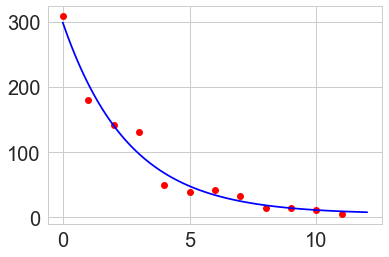

In [69]:
plt.plot(t, data, 'ro')
tt = np.linspace(0,12, 100)
plt.plot(tt, model(tt,best[0],best[1],best[2]), 'b-')

## Make the residual a function of two parameters only

In [107]:
def r(t, y, a, b): #    set c = 0
    return (y - a * np.exp(-b*t))

[ -783.76278588  2318.82842468]


(0.10000000000000001, 10.0, 0.10000000000000001, 10.0)

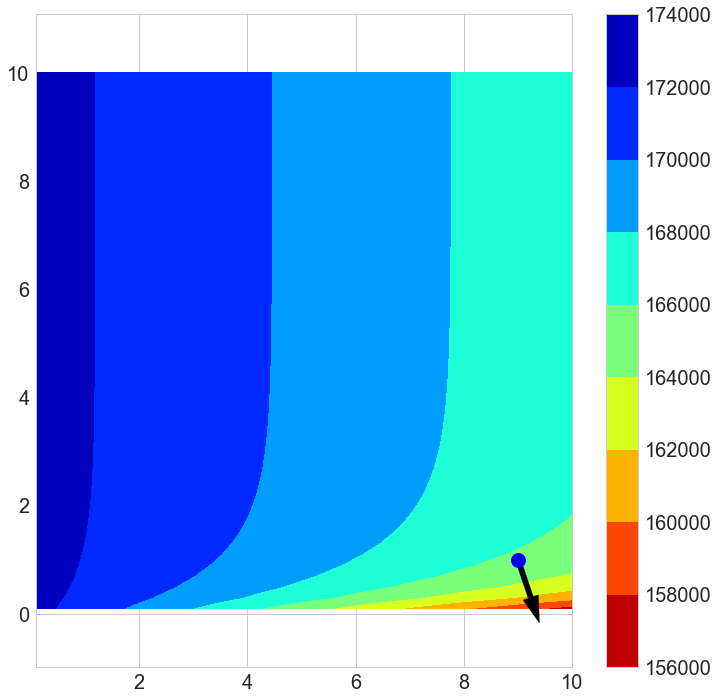

In [124]:
# Creating a small grid for better visualization of the gradient
A, B = np.meshgrid(
    np.linspace(0.1,10,50),
    np.linspace(0.1,10,50)
)

# Evaluating objective function phi for all points of the grid
fi = 0
for tt, d in zip(t, data):
    fi += r(tt, d, A, B)**2

# Obtain the gradient of the objective function phi for a given grid point x
x = np.array([9, 1])

rvec = r(t, data, x[0],x[1])
JT = 2*np.stack([-np.exp(-x[1]*t) ,t*x[0]*np.exp(-x[1]*t)])
gradfi = JT@rvec

print(gradfi)
alpha = 0.0003

plt.figure(figsize=(12,12))
plt.contourf(A, B, fi,  cmap=plt.cm.jet_r)
plt.colorbar()
plt.plot(x[0],x[1], "bo-", lw=3, ms=15)
plt.arrow(x[0],x[1],-alpha*gradfi[0],-alpha*gradfi[1],width=0.1,head_width=0.3, head_length=0.5, fc='k', ec='k')
plt.axis('equal')

[  -272.4315345  61497.9636414]


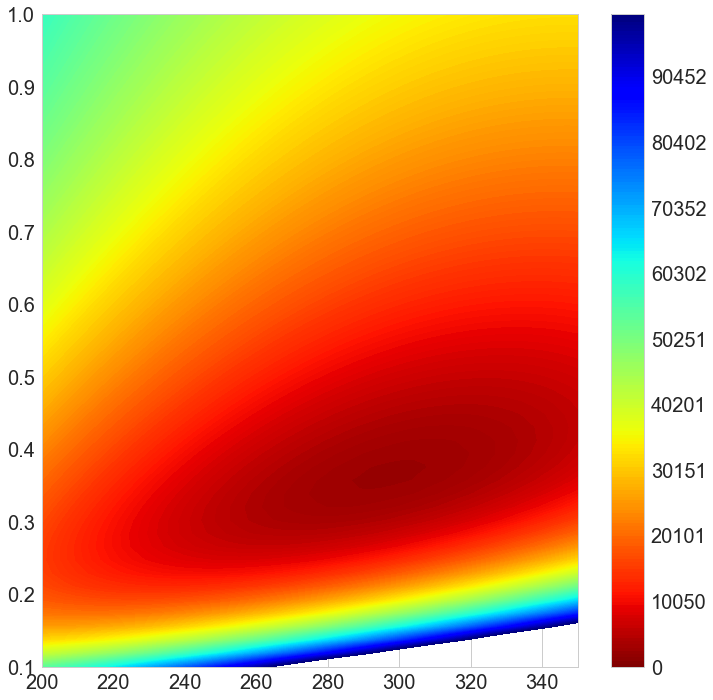

In [154]:
# Creating a bigger grid that contains the minimizer
A, B = np.meshgrid(
    np.linspace(200,350,50),
    np.linspace(0.1,1,50)
)

# Evaluating objective function phi for all points of the grid
fi = 0
for tt, d in zip(t, data):
    fi += r(tt, d, A, B)**2

# Obtain the gradient of the objective function phi for a given grid point x
x = np.array([240, 0.7])

rvec = r(t, data, x[0],x[1])
JT = 2*np.stack([-np.exp(-x[1]*t) ,t*x[0]*np.exp(-x[1]*t)])
gradfi = JT@rvec

print(gradfi)
alpha = 0.00000003

plt.figure(figsize=(12,12))
plt.contourf(A, B, fi,  cmap=plt.cm.jet_r,  levels=np.linspace(0,100000,200) )
plt.colorbar()


In [160]:
# Analytical gradient
x = np.array([240, 0.7])

rvec = r(t, data, x[0],x[1])
JT = 2*np.stack([-np.exp(-x[1]*t) ,t*x[0]*np.exp(-x[1]*t)])
gradfi = JT@rvec
print(gradfi)

#Finite Difference Check
fi1=0
for tt, d in zip(t, data):
    fi1 += r(tt, d, x[0], x[1])**2
fi2=0
h=0.0001
for tt, d in zip(t, data):
    fi2 += r(tt, d, x[0]+h,x[1])**2
print((fi2-fi1)/h)
fi3=0
h=0.000001
for tt, d in zip(t, data):
    fi3 += r(tt, d, x[0],x[1]+h)**2
print((fi3-fi1)/h)

[  -272.4315345  61497.9636414]
-272.431401827
61497.9278944
